# Importing libararies

In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import accuracy_score

# Loading the dataset

In [15]:
missing_value_formats = ["pending"]
adhd_data = pd.read_csv('allSubs_testSet_phenotypic_dx.csv', na_values = missing_value_formats)
adhd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Disclaimer       25 non-null     object 
 1   ID               197 non-null    int64  
 2   Site             197 non-null    int64  
 3   Gender           197 non-null    int64  
 4   Age              197 non-null    float64
 5   Handedness       195 non-null    object 
 6   DX               193 non-null    float64
 7   Secondary Dx     11 non-null     object 
 8   ADHD Measure     51 non-null     float64
 9   ADHD Index       88 non-null     float64
 10  Inattentive      88 non-null     float64
 11  Hyper/Impulsive  88 non-null     float64
 12  Med Status       197 non-null    int64  
 13  IQ Measure       171 non-null    float64
 14  Verbal IQ        137 non-null    float64
 15  Performance IQ   137 non-null    float64
 16  Full2 IQ         75 non-null     float64
 17  Full4 IQ        

# Dataset information

### 1)Top Five Rows

In [16]:
adhd_data.head()

,Disclaimer,ID,Site,Gender,Age,Handedness,DX,Secondary Dx,ADHD Measure,ADHD Index,...,Verbal IQ,Performance IQ,Full2 IQ,Full4 IQ,QC_Rest_1,QC_Rest_2,QC_Rest_3,QC_Rest_4,QC_Anatomical_1,QC_Anatomical_2
0,NaN,1038415,1,1,14.92,1,3.0,ODD,1.0,52.0,...,109.0,103.0,-999.0,107.0,1,NaN,NaN,NaN,1,NaN
1,NaN,1201251,1,1,12.33,1,3.0,NaN,1.0,49.0,...,115.0,103.0,-999.0,110.0,1,NaN,NaN,NaN,1,NaN
2,NaN,1245758,1,0,8.58,1,0.0,NaN,1.0,35.0,...,121.0,88.0,-999.0,106.0,1,NaN,NaN,NaN,1,NaN
3,NaN,1253411,1,1,8.08,1,0.0,NaN,1.0,35.0,...,119.0,106.0,-999.0,114.0,1,NaN,NaN,NaN,1,NaN
4,NaN,1419103,1,0,9.92,1,0.0,NaN,1.0,41.0,...,124.0,76.0,-999.0,102.0,1,NaN,NaN,NaN,1,NaN


### 2) Displaying rows and columns 

In [17]:
adhd_data.shape

(197, 24)

### 3) Displaying the column names

In [18]:
adhd_data.columns

Index(['Disclaimer', 'ID', 'Site', 'Gender', 'Age', 'Handedness', 'DX',
       'Secondary Dx ', 'ADHD Measure', 'ADHD Index', 'Inattentive',
       'Hyper/Impulsive', 'Med Status', 'IQ Measure', 'Verbal IQ',
       'Performance IQ', 'Full2 IQ', 'Full4 IQ', 'QC_Rest_1', 'QC_Rest_2',
       'QC_Rest_3', 'QC_Rest_4', 'QC_Anatomical_1', 'QC_Anatomical_2'],
      dtype='object')

### 4) Displaying data type of each column  

In [19]:
adhd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Disclaimer       25 non-null     object 
 1   ID               197 non-null    int64  
 2   Site             197 non-null    int64  
 3   Gender           197 non-null    int64  
 4   Age              197 non-null    float64
 5   Handedness       195 non-null    object 
 6   DX               193 non-null    float64
 7   Secondary Dx     11 non-null     object 
 8   ADHD Measure     51 non-null     float64
 9   ADHD Index       88 non-null     float64
 10  Inattentive      88 non-null     float64
 11  Hyper/Impulsive  88 non-null     float64
 12  Med Status       197 non-null    int64  
 13  IQ Measure       171 non-null    float64
 14  Verbal IQ        137 non-null    float64
 15  Performance IQ   137 non-null    float64
 16  Full2 IQ         75 non-null     float64
 17  Full4 IQ        

### 5) displaying the number of null values

In [20]:
adhd_data.isnull().sum()

Disclaimer         172
ID                   0
Site                 0
Gender               0
Age                  0
Handedness           2
DX                   4
Secondary Dx       186
ADHD Measure       146
ADHD Index         109
Inattentive        109
Hyper/Impulsive    109
Med Status           0
IQ Measure          26
Verbal IQ           60
Performance IQ      60
Full2 IQ           122
Full4 IQ            27
QC_Rest_1            0
QC_Rest_2          134
QC_Rest_3          163
QC_Rest_4          197
QC_Anatomical_1      0
QC_Anatomical_2    197
dtype: int64

# Pre-Processing Of Data

### 1) Dropping the columns which are not relevant

In [21]:
adhd_data = adhd_data.drop(adhd_data.columns[[0,5,7,19,20,21,23]], axis=1)

### Resultant Data

In [22]:
adhd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               197 non-null    int64  
 1   Site             197 non-null    int64  
 2   Gender           197 non-null    int64  
 3   Age              197 non-null    float64
 4   DX               193 non-null    float64
 5   ADHD Measure     51 non-null     float64
 6   ADHD Index       88 non-null     float64
 7   Inattentive      88 non-null     float64
 8   Hyper/Impulsive  88 non-null     float64
 9   Med Status       197 non-null    int64  
 10  IQ Measure       171 non-null    float64
 11  Verbal IQ        137 non-null    float64
 12  Performance IQ   137 non-null    float64
 13  Full2 IQ         75 non-null     float64
 14  Full4 IQ         170 non-null    float64
 15  QC_Rest_1        197 non-null    int64  
 16  QC_Anatomical_1  197 non-null    int64  
dtypes: float64(11), 

### 2) Filling the Null Values

In [23]:
adhd_data.ffill(inplace=True)

### Resultant Data

In [24]:
adhd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               197 non-null    int64  
 1   Site             197 non-null    int64  
 2   Gender           197 non-null    int64  
 3   Age              197 non-null    float64
 4   DX               197 non-null    float64
 5   ADHD Measure     197 non-null    float64
 6   ADHD Index       197 non-null    float64
 7   Inattentive      197 non-null    float64
 8   Hyper/Impulsive  197 non-null    float64
 9   Med Status       197 non-null    int64  
 10  IQ Measure       197 non-null    float64
 11  Verbal IQ        197 non-null    float64
 12  Performance IQ   197 non-null    float64
 13  Full2 IQ         197 non-null    float64
 14  Full4 IQ         197 non-null    float64
 15  QC_Rest_1        197 non-null    int64  
 16  QC_Anatomical_1  197 non-null    int64  
dtypes: float64(11), 

# Some Stats On The Dataset

In [76]:
adhd_data.describe()

,ID,Site,Gender,Age,DX,ADHD Measure,ADHD Index,Inattentive,Hyper/Impulsive,Med Status,IQ Measure,Verbal IQ,Performance IQ,Full2 IQ,Full4 IQ,QC_Rest_1,QC_Anatomical_1
count,1.970000e+02,197.000000,197.000000,197.000000,197.000000,197.0,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.00000,197.000000,197.0,197.000000
mean,8.463027e+05,3.593909,0.583756,12.214670,0.954315,1.0,51.197970,40.134518,35.906091,1.385787,2.715736,113.101523,108.126904,-401.77665,112.080203,1.0,0.964467
std,1.734740e+06,2.019690,0.494191,3.769128,1.112519,0.0,76.752178,78.431554,78.105420,0.488021,1.040215,12.245359,12.797845,538.06565,12.331272,0.0,0.185594
min,2.000100e+04,1.000000,0.000000,7.260000,0.000000,1.0,-999.000000,-999.000000,-999.000000,1.000000,1.000000,80.000000,67.000000,-999.00000,77.000000,1.0,0.000000
25%,2.104300e+04,1.000000,0.000000,9.320000,0.000000,1.0,49.000000,27.000000,23.000000,1.000000,2.000000,104.000000,102.000000,-999.00000,106.000000,1.0,1.000000
50%,2.600500e+04,4.000000,1.000000,11.280000,1.000000,1.0,50.000000,27.000000,23.000000,1.000000,3.000000,112.000000,112.000000,75.00000,114.000000,1.0,1.000000
75%,1.201251e+06,5.000000,1.000000,14.530000,2.000000,1.0,75.000000,77.000000,72.000000,2.000000,3.000000,121.000000,117.000000,75.00000,119.000000,1.0,1.000000
max,9.744150e+06,7.000000,1.000000,26.310000,3.000000,1.0,90.000000,90.000000,90.000000,2.000000,5.000000,146.000000,143.000000,128.00000,144.000000,1.0,1.000000


### 1) Checking for duplicate values

In [25]:
print(adhd_data[adhd_data.duplicated()])

Empty DataFrame
Columns: [ID, Site, Gender, Age, DX, ADHD Measure, ADHD Index, Inattentive, Hyper/Impulsive, Med Status, IQ Measure, Verbal IQ, Performance IQ, Full2 IQ, Full4 IQ, QC_Rest_1, QC_Anatomical_1]
Index: []


### 2) Checking the correlation of attributes with each other

In [26]:
adhd_data.corr()

,ID,Site,Gender,Age,DX,ADHD Measure,ADHD Index,Inattentive,Hyper/Impulsive,Med Status,IQ Measure,Verbal IQ,Performance IQ,Full2 IQ,Full4 IQ,QC_Rest_1,QC_Anatomical_1
ID,1.000000,-0.612491,0.069546,-0.184157,0.085425,NaN,-0.367792,-0.405318,-0.401205,-0.223306,0.131287,0.202706,-0.163823,-0.529227,0.032733,NaN,0.039102
Site,-0.612491,1.000000,0.029139,-0.011733,-0.233094,NaN,0.251714,0.361901,0.358908,0.107993,-0.332074,-0.365735,0.167021,0.910063,-0.083783,NaN,-0.120358
Gender,0.069546,0.029139,1.000000,-0.070633,0.058035,NaN,0.088607,0.091553,0.091905,-0.113506,-0.151947,0.013763,-0.006126,0.004976,-0.025722,NaN,0.004800
Age,-0.184157,-0.011733,-0.070633,1.000000,0.100140,NaN,0.017700,-0.043185,-0.043518,0.221275,0.654273,0.156233,-0.048520,0.127432,0.019924,NaN,0.066318
DX,0.085425,-0.233094,0.058035,0.100140,1.000000,NaN,0.065385,0.032230,0.025286,0.135997,0.023991,-0.127366,-0.240039,-0.268710,-0.201674,NaN,0.041518
ADHD Measure,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ADHD Index,-0.367792,0.251714,0.088607,0.017700,0.065385,NaN,1.000000,0.988169,0.987485,0.074774,-0.106906,-0.095159,-0.000623,0.213459,-0.041473,NaN,-0.042484
Inattentive,-0.405318,0.361901,0.091553,-0.043185,0.032230,NaN,0.988169,1.000000,0.996690,0.050089,-0.193953,-0.154442,0.001147,0.311387,-0.065094,NaN,-0.055750
Hyper/Impulsive,-0.401205,0.358908,0.091905,-0.043518,0.025286,NaN,0.987485,0.996690,1.000000,0.049811,-0.192364,-0.146797,-0.000942,0.309300,-0.063765,NaN,-0.054786
Med Status,-0.223306,0.107993,-0.113506,0.221275,0.135997,NaN,0.074774,0.050089,0.049811,1.000000,0.096524,0.019879,0.067276,0.064527,0.014586,NaN,-0.073201


### 3) number of patients of different types

In [45]:
adhd_data['DX'].value_counts()

0.0    94
1.0    50
3.0    32
2.0    21
Name: DX, dtype: int64

### Resultant Data

In [27]:
adhd_data.isna().sum()

ID                 0
Site               0
Gender             0
Age                0
DX                 0
ADHD Measure       0
ADHD Index         0
Inattentive        0
Hyper/Impulsive    0
Med Status         0
IQ Measure         0
Verbal IQ          0
Performance IQ     0
Full2 IQ           0
Full4 IQ           0
QC_Rest_1          0
QC_Anatomical_1    0
dtype: int64

# Visualising The Data

### 1) Importing The Libraries

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### 2) Various Countplots

#### Gender vs Counts

C:\Users\hp\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


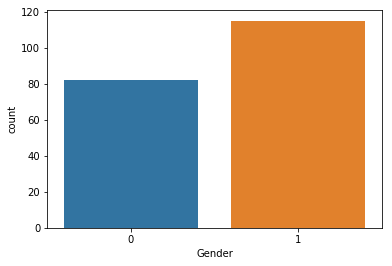

In [29]:
sns.countplot(adhd_data['Gender'])

#### Count vs Types 

C:\Users\hp\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


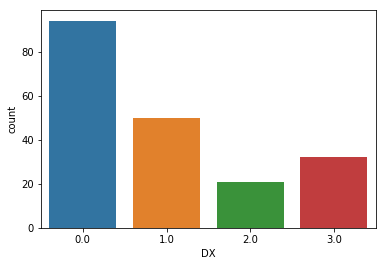

In [30]:
sns.countplot(adhd_data['DX'])

#### Count vs Site

C:\Users\hp\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


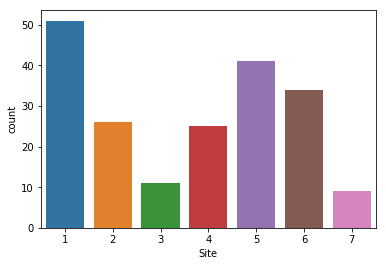

In [50]:
sns.countplot(adhd_data['Site'])

#### IQ Measure Vs Count

C:\Users\hp\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


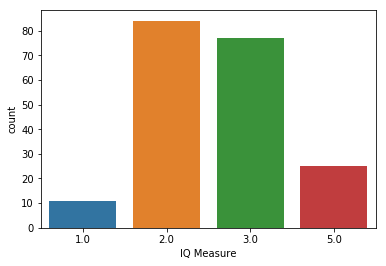

In [51]:
sns.countplot(adhd_data['IQ Measure'])

### 2) Various Barplots

#### ADHD Index Vs Type and gender distribution

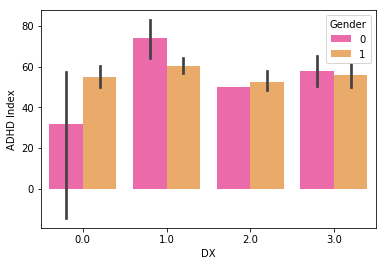

In [52]:
sns.barplot(x = 'DX', y = 'ADHD Index', hue='Gender', data = adhd_data, palette='spring')  #shows that males with high adhd index are sure to have the disorder

#### Inattentive Index Vs type and Gender Distribution

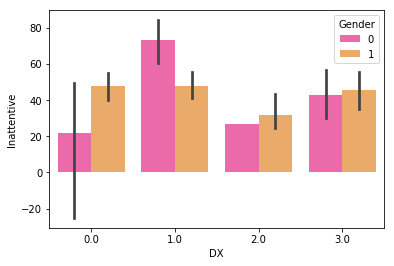

In [53]:
sns.barplot(x = 'DX', y = 'Inattentive', hue='Gender', data = adhd_data, palette='spring')  #shows that males who are more inattentive have the disorder

### 3) Pie Chart

#### Percentage Distribution

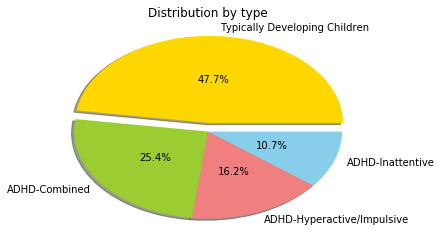

In [31]:
types = ['Typically Developing Children','ADHD-Combined','ADHD-Hyperactive/Impulsive','ADHD-Inattentive']
sizes = ['94','50','32','21']
color = ['gold', 'yellowgreen', 'lightcoral', 'skyblue']
explode = (0.1,0,0,0)
plt.pie(sizes,labels=types,colors=color,autopct='%1.1f%%',explode=explode,pctdistance=0.5,shadow=True)
plt.title('Distribution by type')
plt.show()

# Applying Machine Learning Model

### 1) Support Vector Machine

#### Grouping the Data by type column

In [56]:
adhd_data.groupby('DX').mean()

,ID,Site,Gender,Age,ADHD Measure,ADHD Index,Inattentive,Hyper/Impulsive,Med Status,IQ Measure,Verbal IQ,Performance IQ,Full2 IQ,Full4 IQ,QC_Rest_1,QC_Anatomical_1
DX,,,,,,,,,,,,,,,,
0.0,7.962024e+05,3.936170,0.489362,11.994681,1.0,43.154255,34.627660,30.547872,1.329787,2.648936,114.968085,111.542553,-320.787234,114.978723,1.0,0.957447
1.0,8.014071e+05,3.960000,0.820000,11.680000,1.0,62.980000,52.480000,48.900000,1.340000,2.800000,110.840000,104.740000,-200.220000,108.716000,1.0,0.960000
2.0,1.941290e+05,2.142857,0.428571,13.795714,1.0,51.000000,29.047619,25.476190,1.666667,2.952381,115.000000,110.285714,-947.857143,115.000000,1.0,1.000000
3.0,1.491611e+06,2.968750,0.593750,12.658750,1.0,56.546875,44.296875,38.187500,1.437500,2.625000,109.906250,101.968750,-596.250000,106.906250,1.0,0.968750


#### Selecting dependent and Independant Variables

In [58]:
X = adhd_data.drop(columns=['DX','ID'], axis=1)
Y = adhd_data['DX']

In [59]:
print(X)

     Site  Gender    Age  ADHD Measure  ADHD Index  Inattentive  \
0       1       1  14.92           1.0        52.0         34.0   
1       1       1  12.33           1.0        49.0         28.0   
2       1       0   8.58           1.0        35.0         20.0   
3       1       1   8.08           1.0        35.0         19.0   
4       1       0   9.92           1.0        41.0         22.0   
..    ...     ...    ...           ...         ...          ...   
192     7       1  15.90           1.0        75.0         77.0   
193     7       1  13.87           1.0        75.0         77.0   
194     7       0  15.04           1.0        75.0         77.0   
195     7       1  13.64           1.0        75.0         77.0   
196     7       1  13.72           1.0        75.0         77.0   

     Hyper/Impulsive  Med Status  IQ Measure  Verbal IQ  Performance IQ  \
0               18.0           1         3.0      109.0           103.0   
1               21.0           2         3.0 

In [60]:
print(Y)

0      3.0
1      3.0
2      0.0
3      0.0
4      0.0
      ... 
192    3.0
193    0.0
194    3.0
195    0.0
196    3.0
Name: DX, Length: 197, dtype: float64


#### Splitting The Data into Train and Test set 

In [61]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

#### Shape of data after the split

In [62]:
print(X.shape, X_train.shape, X_test.shape)

(197, 15) (157, 15) (40, 15)


#### Scaling The Data

In [63]:
scaler = StandardScaler()

In [64]:
scaler.fit(X_train)

StandardScaler()

#### Transforming The Data

In [65]:
X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)

In [66]:
print(X_train)

[[ 0.65676192 -1.27148207 -1.27709943 ... -0.46623469  0.
   0.21602469]
 [ 1.16470095 -1.27148207 -0.79374123 ...  0.11616122  0.
   0.21602469]
 [ 0.1488229   0.78648376  1.22364322 ...  0.36575947  0.
   0.21602469]
 ...
 [-0.86705515 -1.27148207  1.39917856 ... -0.05023761  0.
   0.21602469]
 [-1.37499417 -1.27148207  0.71230113 ... -0.29983586  0.
   0.21602469]
 [ 1.16470095 -1.27148207  0.03305567 ... -0.05023761  0.
   0.21602469]]


#### Building The Model

In [67]:
model = svm.SVC(kernel='linear')

#### Fitting The Model

In [68]:
model.fit(X_train, Y_train)

SVC(kernel='linear')

#### Accuracy

In [69]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)

In [70]:
print('Accuracy score of training data : ', training_data_accuracy)

Accuracy score of training data :  0.6942675159235668


In [71]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)

In [72]:
print('Accuracy score of test data : ', test_data_accuracy)

Accuracy score of test data :  0.675


#### Predicting the Results

In [74]:
input_data = (1,1,14,1,52,34,18,1,3,109,103,-999,107,1,1)

# changing input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the data
std_data = scaler.transform(input_data_reshaped)

prediction = model.predict(std_data)
print(int(prediction))


if (int(prediction[0]) == 0):
    print("The Person has Developing ADHD")
elif(int(prediction[0]) == 1):
    print("the person has ADHD-Combined")
elif(int(prediction[0]) == 2):
    print("the person has ADHD-Hyperactive/Impulsive")
else:
    print("The Person has ADHD-Inattentive")

3
The Person has ADHD-Inattentive


### 2) Decision Tree Classifier

#### Importing The Libraries

In [92]:
from sklearn.tree import DecisionTreeClassifier

#### Selecting dependent and Independant Variables

In [93]:
X = adhd_data.drop(columns=['DX','ID'], axis=1)
Y = adhd_data['DX']

#### Splitting Data Into Test and Train

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1) 

#### Shape of data after the split

In [100]:
print(X.shape, X_train.shape, X_test.shape)

(197, 15) (157, 15) (40, 15)


#### Scaling The Data

In [101]:
scaler = StandardScaler()

In [102]:
scaler.fit(X_train)

StandardScaler()

#### Transforming The Data

In [103]:
X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)

In [104]:
print(X_train)

[[-0.79675207  0.79713027  1.35487068 ...  0.58878026  0.
   0.19933665]
 [ 0.71035727  0.79713027 -0.78850632 ...  0.51065441  0.
   0.19933665]
 [-1.29912185 -1.2545001   0.46320334 ... -0.34872989  0.
   0.19933665]
 ...
 [-0.79675207 -1.2545001   1.6220896  ... -0.03622651  0.
   0.19933665]
 [ 0.71035727 -1.2545001  -0.91789653 ...  0.58878026  0.
   0.19933665]
 [-1.29912185  0.79713027  0.34506445 ... -1.0518625   0.
   0.19933665]]


#### Building And Fitting The Model

In [107]:
clf = DecisionTreeClassifier()
# Train Decision Tree Classifer
clf.fit(X_train,y_train)

DecisionTreeClassifier()

#### Accuracy

In [108]:
X_train_prediction = clf.predict(X_train)
training_data_accuracy = accuracy_score(y_train, X_train_prediction)

In [110]:
X_test_prediction = clf.predict(X_test)
test_data_accuracy = accuracy_score(y_test, X_test_prediction)

In [111]:
print('Accuracy score of test data : ', test_data_accuracy)

Accuracy score of test data :  0.75


#### Predicting The Results

In [112]:
input_data = (1,1,14,1,52,34,18,1,3,109,103,-999,107,1,1)

# changing input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the data
std_data = scaler.transform(input_data_reshaped)

prediction = clf.predict(std_data)
print(int(prediction))


if (int(prediction[0]) == 0):
    print("The Person has Developing ADHD")
elif(int(prediction[0]) == 1):
    print("the person has ADHD-Combined")
elif(int(prediction[0]) == 2):
    print("the person has ADHD-Hyperactive/Impulsive")
else:
    print("The Person has ADHD-Inattentive")

3
The Person has ADHD-Inattentive
